In [ ]:
import pandas as pd

import numpy as np

import pickle

import matplotlib.pyplot as plt

get_ipython().run_line_magic('matplotlib', 'inline')

import seaborn as sns

import sklearn

from sklearn. tree import DecisionTreeClassifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import RandomizedSearchCV

import imblearn

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

In [ ]:
data = pd.read_csv (r'C:\Users\DIVYA\Desktop\mini project\dataset\train_dataset.csv.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1002,Male,No,0,Graduate,No,5849,0,60,360,1,Urban,Y
1,1003,Male,Yes,1,Graduate,No,4583,1508,128,360,1,Rural,N
2,1005,Male,Yes,0,Graduate,Yes,3000,0,66,360,1,Urban,Y
3,1006,Male,Yes,0,Not Graduate,No,2583,2358,120,360,1,Urban,Y
4,1008,Male,No,0,Graduate,No,6000,0,141,360,1,Urban,Y


In [ ]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
data.drop(['Loan_ID'],inplace=True,axis=1)

In [ ]:
data['Gender']=data['Gender'].map({'Female':1,'Male':0})
data['Property_Area']=data['Property_Area'].map({'Urban':2,'Semiurban':1,'Rural':0})
data['Married']=data['Married'].map({'Yes':1,'No':0})
data['Education']=data['Education'].map({'Graduate':1,'Not Graduate':0})
data['Self_Employed']=data['Self_Employed'].map({'Yes':1,'No':0})
data['Loan_Status']=data['Loan_Status'].map({'Y':1,'N':0})

In [ ]:
data['Gender']=data['Gender'].fillna(0).astype('int64')
data['Married']=data['Married'].fillna(0).astype('int64')
data['Dependents']=data['Dependents'].fillna(0).astype('int64')
data['Self_Employed']=data['Self_Employed'].fillna(0).astype('int64')
data['CoapplicantIncome']=data['CoapplicantIncome'].fillna(0).astype('int64')
data['LoanAmount']=data['LoanAmount'].fillna(0).astype('int64')
data['Loan_Amount_Term']=data['Loan_Amount_Term'].fillna(0).astype('int64')
data['Credit_History']=data['Credit_History'].fillna(0).astype('int64')


In [ ]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,1,0,5849,0,60,360,1,2,1
1,0,1,1,1,0,4583,1508,128,360,1,0,0
2,0,1,0,1,1,3000,0,66,360,1,2,1
3,0,1,0,0,0,2583,2358,120,360,1,2,1
4,0,0,0,1,0,6000,0,141,360,1,2,1


In [ ]:
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data['Married'] = data['Married'].fillna(data['Married'].mode()[0])
data['Dependents'] = data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].mode()[0])
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0])
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].mode()[0])
data['Loan_Status'] = data['Loan_Status']

In [ ]:
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Gender             614 non-null    int64
 1   Married            614 non-null    int64
 2   Dependents         614 non-null    int64
 3   Education          614 non-null    int64
 4   Self_Employed      614 non-null    int64
 5   ApplicantIncome    614 non-null    int64
 6   CoapplicantIncome  614 non-null    int64
 7   LoanAmount         614 non-null    int64
 8   Loan_Amount_Term   614 non-null    int64
 9   Credit_History     614 non-null    int64
 10  Property_Area      614 non-null    int64
 11  Loan_Status        614 non-null    int64
dtypes: int64(12)
memory usage: 57.7 KB


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


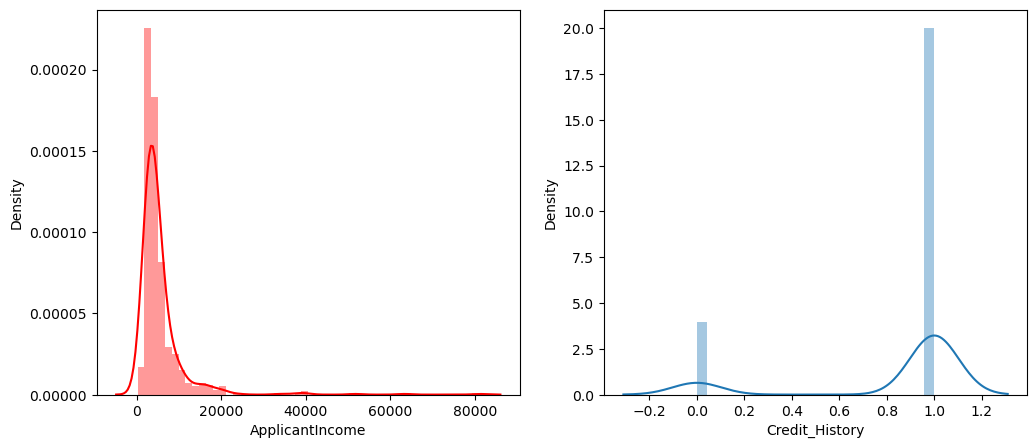

In [ ]:
plt.figure(figsize=(12,5))

plt.subplot(121)

sns.distplot(data['ApplicantIncome'], color='r')

plt.subplot(122)

sns.distplot(data['Credit_History'])

plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


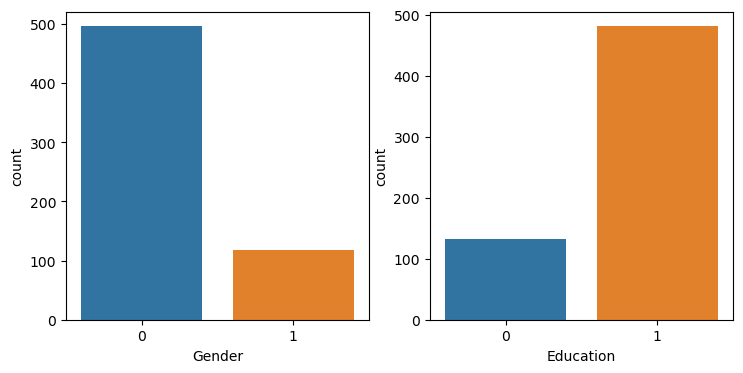

In [ ]:
plt.figure(figsize=(18,4))

plt.subplot(1,4,1)

sns.countplot(data["Gender"])

plt.subplot(1,4,2)

sns.countplot(data["Education"])

plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Property_Area', ylabel='count'>

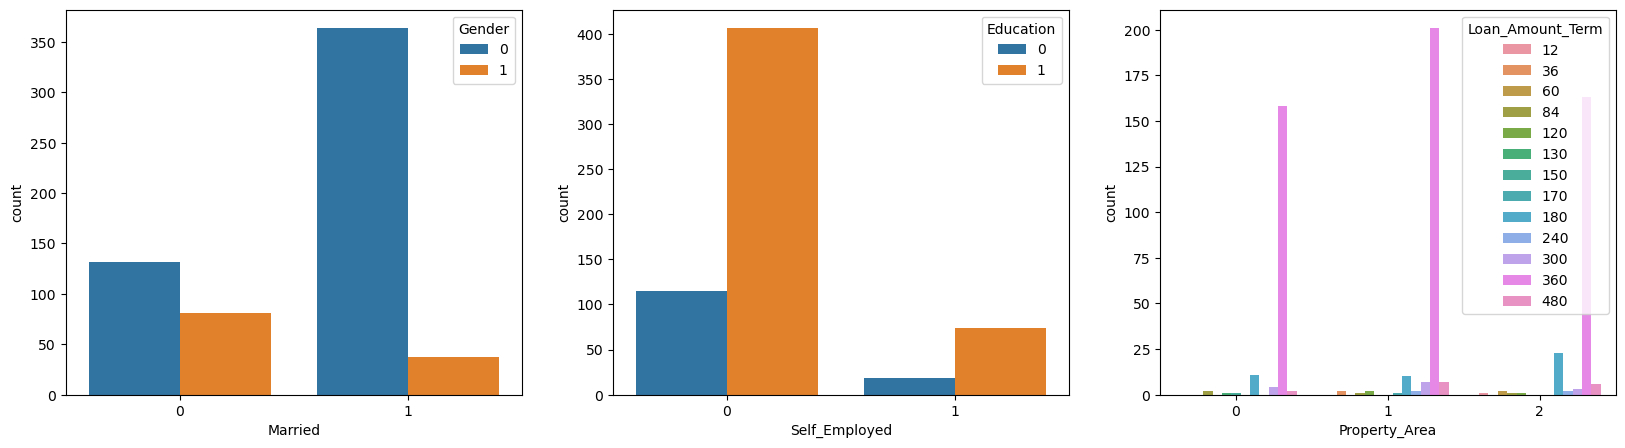

In [ ]:
plt.figure(figsize=(20,5))

plt.subplot(131)

sns.countplot(data['Married'], hue=data['Gender'])

plt.subplot(132)

sns.countplot(data['Self_Employed'], hue=data['Education'])

plt.subplot(133)

sns.countplot(data['Property_Area'], hue=data['Loan_Amount_Term'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 61.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 25.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Gender', ylabel='ApplicantIncome'>

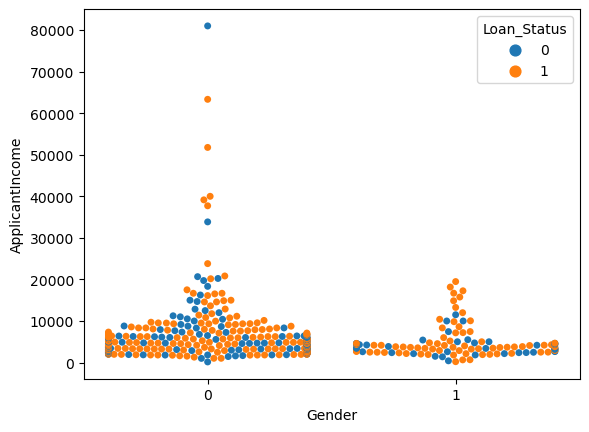

In [ ]:
sns.swarmplot(data['Gender'], data['ApplicantIncome'], hue = data['Loan_Status'])

In [ ]:
pd.crosstab(data['Gender'],[data['Self_Employed']])

Self_Employed,0,1
Gender,,
0,424,72
1,98,20


In [ ]:
data.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.00000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.192182,0.653094,0.749186,0.783388,0.149837,5403.459283,1621.24430,146.501629,341.286645,0.833876,1.037459,0.687296
std,0.394337,0.476373,1.013268,0.412272,0.357203,6109.041673,2926.24876,86.096512,65.826946,0.372495,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.00000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,2877.500000,0.00000,100.000000,360.000000,1.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,1.000000,0.000000,3812.500000,1188.50000,128.000000,360.000000,1.000000,1.000000,1.000000
75%,0.000000,1.000000,1.000000,1.000000,0.000000,5795.000000,2297.25000,165.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.00000,700.000000,480.000000,1.000000,2.000000,1.000000


In [ ]:
pip install imblearn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from imblearn.combine import SMOTETomek

In [ ]:
smote = SMOTETomek (0.90)

C:\Users\DIVYA\AppData\Roaming\Python\Python39\site-packages\imblearn\utils\_validation.py:586: FutureWarning: Pass sampling_strategy=0.9 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


In [ ]:
y = data['Loan_Status']
x = data.drop(columns=['Loan_Status'], axis=1)

In [ ]:
x.shape

(614, 11)

In [ ]:
y.shape

(614,)

In [ ]:
x_bal,y_bal=smote.fit_resample((x),(y))

In [ ]:
print(y.value_counts())
print(y_bal.value_counts())


1    422
0    192
Name: Loan_Status, dtype: int64
1    356
0    313
Name: Loan_Status, dtype: int64


In [ ]:
names = x_bal.columns

In [ ]:
#performing the feature scaling operation using StandardScaler on x part o f dataset 
# because of different type of values
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [ ]:
x_bal = ss.fit_transform(x_bal)

In [ ]:
x_bal = pd.DataFrame(x_bal,columns=names)

In [ ]:
x_bal

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,-0.44601,-1.196966,-0.719283,0.613631,-0.355335,0.100474,-0.512480,-1.057107,0.297718,0.625182,1.343660
1,-0.44601,0.835446,0.313336,0.613631,-0.355335,-0.114677,-0.059283,-0.239279,0.297718,0.625182,-1.199221
2,-0.44601,0.835446,-0.719283,0.613631,2.814249,-0.383702,-0.512480,-0.984946,0.297718,0.625182,1.343660
3,-0.44601,0.835446,-0.719283,-1.629643,-0.355335,-0.454569,0.196166,-0.335494,0.297718,0.625182,1.343660
4,-0.44601,-1.196966,-0.719283,0.613631,-0.355335,0.126136,-0.512480,-0.082930,0.297718,0.625182,1.343660
...,...,...,...,...,...,...,...,...,...,...,...
664,-0.44601,0.835446,0.313336,0.613631,-0.355335,-0.410723,0.054918,-0.131037,0.297718,-1.599535,-1.199221
665,-0.44601,-1.196966,0.313336,-1.629643,-0.355335,-0.251144,0.338016,0.049366,0.297718,-1.599535,0.072219
666,-0.44601,-1.196966,-0.719283,-1.629643,-0.355335,0.152138,-0.512480,-0.383602,0.297718,-1.599535,-1.199221
667,-0.44601,-1.196966,-0.719283,0.613631,-0.355335,2.611598,-0.512480,-0.311440,0.297718,0.625182,-1.199221


In [ ]:
x_bal = pd.DataFrame(x_bal,columns = names)


In [ ]:
#splitting the dataset train and test on balanced 

x_train,x_test,y_train,y_test = train_test_split(x_bal,y_bal,test_size=0.33,random_state=42)

In [ ]:
x_train.shape, x_test.shape


((448, 11), (221, 11))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
def RandomForest(x_train,x_test,y_train,y_test):
    model = RandomForestClassifier()
    model.fit(x_train,y_train)
    y_tr = model.predict(x_train)
    print(accuracy_score(y_tr,y_train))
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print(accuracy_score(y_pred,y_test))

In [ ]:
RandomForest(x_train,x_test,y_train,y_test)

1.0
0.8144796380090498


In [ ]:
#importing and modeling the DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
def decisionTree(x_train,x_test,y_train,y_test):
    model = DecisionTreeClassifier()
    model.fit(x_train,y_train)
    y_tr = model.predict(x_train)
    print(accuracy_score(y_tr,y_train))
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print(accuracy_score(y_pred,y_test))

In [ ]:
decisionTree(x_train,x_test,y_train,y_test)

1.0
0.7601809954751131


In [ ]:
#importing and modeling the KNN
from sklearn.neighbors import KNeighborsClassifier
def KNN(x_train,x_test,y_train,y_test):
    model = KNeighborsClassifier()
    model.fit(x_train,y_train)
    y_tr = model.predict(x_train)
    print(accuracy_score(y_tr,y_train))
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print(accuracy_score(y_pred,y_test))

In [ ]:
KNN(x_train,x_test,y_train,y_test)

0.8459821428571429
0.7601809954751131


In [ ]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import xgboost as xgb

In [ ]:
#importing and modeling the xgboost
from xgboost import XGBClassifier
def XGB(x_train,x_test,y_train,y_test):
    model = XGBClassifier()
    model.fit(x_train,y_train)
    y_tr = model.predict(x_train)
    print(accuracy_score(y_tr,y_train))
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print(accuracy_score(y_pred,y_test))

In [ ]:
XGB(x_train,x_test,y_train,y_test)

1.0
0.832579185520362


In [ ]:
rf = RandomForestClassifier()

In [ ]:
#giving some parameters it is to used for randomized search cv
parameters = {
    'n_estimators':[1,20,30,55,68,74,90,120,115],
    'criterion':['gini','entropy'],
    'max_features':['auto','sqrt','log2'],
    'max_depth':[2,5,8,10],
    'verbose':[1,2,3,4,5,6,7,8,9,10]
}

In [ ]:
#performing the randomized cv
from sklearn.model_selection import RandomizedSearchCV
RCV = RandomizedSearchCV(estimator=rf,param_distributions=parameters,cv=10,n_iter=4)

In [ ]:
#training  and testing the best parameter model from randomized cv

def RandomForest(x_train,x_test,y_train,y_test):
    model = RandomForestClassifier(verbose= 4,
 n_estimators= 30,
 max_features= 'log2',
 max_depth= 10,
 criterion= 'entropy')
    model.fit(x_train,y_train)
    y_tr = model.predict(x_train)
    print(accuracy_score(y_tr,y_train))
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print(accuracy_score(y_pred,y_test))

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
# Random forest model is selected
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
yPred = rf.predict(x_test)

In [ ]:
f1_score(yPred,y_test, average='weighted')

0.815934970012034

In [ ]:
cv=cross_val_score(rf,x,y,cv=5)

In [ ]:
np.mean(cv)

0.8013461282153805

In [ ]:
from flask import Flask, render_template, request
import numpy as np
import pickle

In [ ]:
app = Flask (__name__)
model= pickle.load(open (r'rdf.pkl', 'rb')) 

In [ ]:
pickle.dump(model,open('rdf.pkl','wb'))